λ_0= 0.0001 s_dec/λ_0= 0.4003984521055314 χ_dec/λ_0= 2.3904e-01
M_DM_dec= 2.7639e+27 kg
λ_0= 0.0002 s_dec/λ_0= 0.4003940041551903 χ_dec/λ_0= 2.3904e-01
M_DM_dec= 5.5277e+27 kg
λ_0= 0.0003 s_dec/λ_0= 0.40038955853717534 χ_dec/λ_0= 2.3904e-01
M_DM_dec= 8.2915e+27 kg
λ_0= 0.0004 s_dec/λ_0= 0.40038511350224193 χ_dec/λ_0= 2.3904e-01
M_DM_dec= 1.1055e+28 kg
λ_0= 0.0005 s_dec/λ_0= 0.4003828909264637 χ_dec/λ_0= 2.3903e-01
M_DM_dec= 1.3819e+28 kg
λ_0= 0.0006 s_dec/λ_0= 0.4003784462413798 χ_dec/λ_0= 2.3903e-01
M_DM_dec= 1.6583e+28 kg
λ_0= 0.0007 s_dec/λ_0= 0.4003740016229337 χ_dec/λ_0= 2.3903e-01
M_DM_dec= 1.9346e+28 kg
λ_0= 0.0008 s_dec/λ_0= 0.400369557046136 χ_dec/λ_0= 2.3903e-01
M_DM_dec= 2.2110e+28 kg
λ_0= 0.0009 s_dec/λ_0= 0.40036511249710405 χ_dec/λ_0= 2.3903e-01
M_DM_dec= 2.4873e+28 kg
λ_0= 0.001 s_dec/λ_0= 0.4003628901934326 χ_dec/λ_0= 2.3902e-01
M_DM_dec= 2.7637e+28 kg
λ_0= 0.002 s_dec/λ_0= 0.40032066755099177 χ_dec/λ_0= 2.3901e-01
M_DM_dec= 5.5267e+28 kg
λ_0= 0.003 s_dec/λ_0= 0.4002806

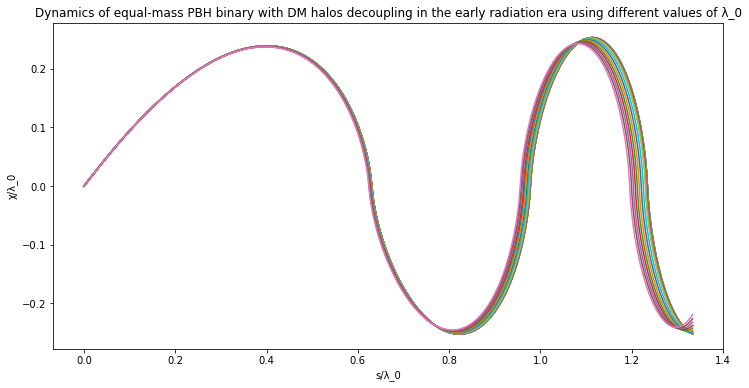

In [26]:
# Attempt to estimate the mass of the DM halos in the equal-mass PBH binary at the point of decoupling for
# PBH binary decoulping early in the radiation era using eqs.(43),(50) & (53) in reference 
# pdf "PBH binary" .

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math


fig=plt.figure(figsize=(12,6))

π=3.14
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
M_PBH=1e32            # in kg
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity



def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s)) #eq.(57) in reference pdf "PBH binary".
def  k_r(s):
    return (1/n_r(s))
def λ_r(s):
    return λ_0*k_r(s)


λ_3_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001, 0.002, 0.003, 0.004,
          0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for λ_0 in λ_3_list:
    def f(u,s,λ_0):
        return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_r(s)*((u[0]**2+b**2)**(3/2))))]
    separation0= [1e-12,1]
    b= λ_0/100
    ss= np.linspace(1e-12,((4*λ_0)/3),600000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.plot(As,Bs,'')
    plt.xlabel('s/λ_0')
    plt.ylabel('χ/λ_0')
    plt.title('Dynamics of equal-mass PBH binary with DM halos decoupling in the early radiation era using different values of λ_0')
    Bs_list = Bs.tolist() 
    As_list = As.tolist()
    C=zip(As_list,Bs_list)
    for i,C in enumerate(C):
        Δ=(Bs[i] - Bs[i-1])
        if (Δ)<0:
            print("λ_0=",λ_0,"s_dec/λ_0=",As[i],"χ_dec/λ_0=",'%.4e'%Bs[i])
            
            def M_r(s):    #eq.(43) in reference pdf "PBH binary".
                return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s) 
            
            print("M_DM_dec=", '%.4e'%M_r((As[i]*λ_0)),"kg")
            break
    λ_0+=0.0001

λ_0= 1.0 s_dec/λ_0= 1e-12 χ_dec/λ_0= 1.0000e-12
M_DM_dec= 6.9029e+19 kg
λ_0= 1.5 s_dec/λ_0= 6.666666666666667e-13 χ_dec/λ_0= 6.6667e-13
M_DM_dec= 6.9029e+19 kg
λ_0= 2.0 s_dec/λ_0= 5e-13 χ_dec/λ_0= 5.0000e-13
M_DM_dec= 6.9029e+19 kg
λ_0= 2.5 s_dec/λ_0= 4e-13 χ_dec/λ_0= 4.0000e-13
M_DM_dec= 6.9029e+19 kg
λ_0= 3.0 s_dec/λ_0= 0.43138431384339987 χ_dec/λ_0= 2.3798e-01
M_DM_dec= 8.9334e+31 kg
λ_0= 3.5 s_dec/λ_0= 0.44332443324455484 χ_dec/λ_0= 2.4351e-01
M_DM_dec= 1.0711e+32 kg


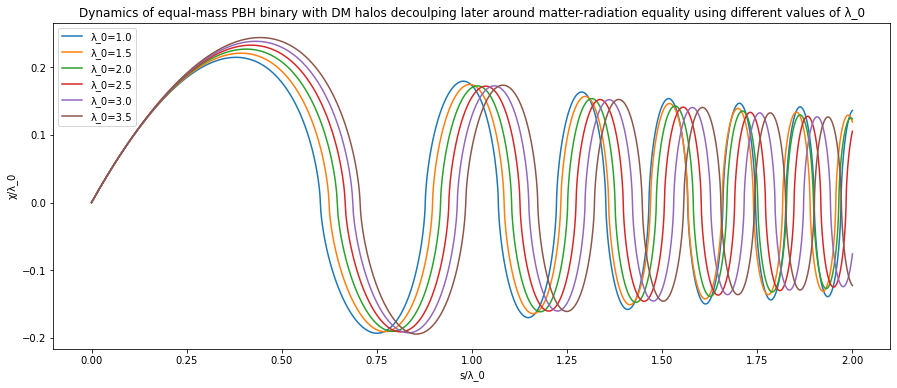

In [35]:
# Attempt to estimate the mass of the DM halos in the equal-mass PBH binary at the point of decoupling for
# PBH binary decoulping later around matter-radiation equality using eqs.(42),(47)& (53) in reference 
# pdf "PBH binary" .

fig=plt.figure(figsize=(15,6))

def M_r(s):    #eq.(43) in reference pdf "PBH binary".
    return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s) 

def h(x):
    return math.sqrt((x**-3)+(x**-4))   
def g(x):
    return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
                    #eq.(56) in reference pdf "PBH binary".

def  k(s):
    return (1/n(s))

def λ(s):
    return λ_0*k(s)
   
λ_3_list=[1.0,1.5,2.0,2.5,3.0,3.5]
for λ_0 in λ_3_list:
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]

    separation0= [1e-12,1]
    b= 0.9*λ_0/1000
    ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.plot(As,Bs,'')
    plt.xlabel('s/λ_0')
    plt.ylabel('χ/λ_0')
    plt.legend(["λ_0=1.0","λ_0=1.5","λ_0=2.0","λ_0=2.5","λ_0=3.0","λ_0=3.5"])
    plt.title('Dynamics of equal-mass PBH binary with DM halos decoulping later around matter-radiation equality using different values of λ_0')
    Bs_list = Bs.tolist() 
    As_list = As.tolist()
    C=zip(As_list,Bs_list)
    for i,C in enumerate(C):
        Δ=(Bs[i] - Bs[i-1])
        if (Δ)<0:
            print("λ_0=",λ_0,"s_dec/λ_0=",As[i],"χ_dec/λ_0=",'%.4e'%Bs[i])
            
            def M(s):               #eq.(42) in reference pdf "PBH binary".
                return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)
                                    *math.sqrt(s+1))+(4/3)))
                                  
            print("M_DM_dec=", '%.4e'%M_r((As[i]*λ_0)),"kg")
            break
            
            
λ_0+=0.5       
  
        

                                              
                                                                               

plt.show()